**Car Price Prediction Project Report**

1. Introduction
The goal of this project is to predict the selling price of used cars based on various features such as vehicle age, mileage, engine type, fuel type, transmission, and other relevant factors. Predicting car prices accurately is a critical task for car dealerships, online marketplaces, and potential buyers. The model uses machine learning techniques to learn patterns in the data and make predictions based on the input features. In this project, we employ two machine learning models: Linear Regression and Random Forest Regressor. The performance of each model is compared using evaluation metrics such as Root Mean Squared Error (RMSE) and R² (R-squared).

2. Dataset Overview
The dataset used in this project is sourced from a CarDekho dataset, which contains details of used cars listed for sale. Key attributes in the dataset include:

selling_price: The target variable representing the selling price of the car.
vehicle_age: The age of the vehicle in years.
km_driven: The total kilometers driven by the car.
fuel_type: The type of fuel used by the car (e.g., Petrol, Diesel, CNG).
seller_type: The type of seller (e.g., Individual, Dealer).
transmission_type: The type of transmission (e.g., Manual, Automatic).
mileage: The car’s mileage (in kilometers per liter).
max_power: Maximum power of the car’s engine.
engine: The engine capacity of the car.
seats: The number of seats in the car.

3. Data Preprocessing
Data preprocessing is a critical step in any machine learning pipeline. The following steps were carried out during data preprocessing:

a. Handling Missing Data: We check for any missing values in the dataset. If found, missing values were either imputed or dropped based on the context of the feature.

b. Categorical Data Encoding: Features such as fuel_type, seller_type, and transmission_type were categorical. We used Label Encoding to convert these categorical variables into numerical values, making them suitable for machine learning models.

c. Feature Selection: We selected the most relevant features for the prediction model based on domain knowledge and correlation analysis. The chosen features include vehicle_age, km_driven, fuel_type, seller_type, transmission_type, mileage, max_power, engine, and seats.

d. Target Variable: The target variable for this prediction task is selling_price.





Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('cardekho_dataset.csv')

# Dataset summary
print("Dataset Summary:")
print(df.describe())

# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Dataset Information
print("\nDataset Information:")
df.info()

print("Shape of the dataset:",df.shape)


# Car with max and min selling price
max_selling_car = df.loc[df['selling_price'].idxmax(), 'car_name']
min_selling_car = df.loc[df['selling_price'].idxmin(), 'car_name']
max_selling_price = df['selling_price'].max()
min_selling_price = df['selling_price'].min()

print(f"Maximum selling price: {max_selling_price} (Car: {max_selling_car})")
print(f"Minimum selling price: {min_selling_price} (Car: {min_selling_car})")



Dataset Summary:
         Unnamed: 0   vehicle_age     km_driven       mileage        engine  \
count  15411.000000  15411.000000  1.541100e+04  15411.000000  15411.000000   
mean    9811.857699      6.036338  5.561648e+04     19.701151   1486.057751   
std     5643.418542      3.013291  5.161855e+04      4.171265    521.106696   
min        0.000000      0.000000  1.000000e+02      4.000000    793.000000   
25%     4906.500000      4.000000  3.000000e+04     17.000000   1197.000000   
50%     9872.000000      6.000000  5.000000e+04     19.670000   1248.000000   
75%    14668.500000      8.000000  7.000000e+04     22.700000   1582.000000   
max    19543.000000     29.000000  3.800000e+06     33.540000   6592.000000   

          max_power         seats  selling_price  
count  15411.000000  15411.000000   1.541100e+04  
mean     100.588254      5.325482   7.749711e+05  
std       42.972979      0.807628   8.941284e+05  
min       38.400000      0.000000   4.000000e+04  
25%       74.000

Different visualizations

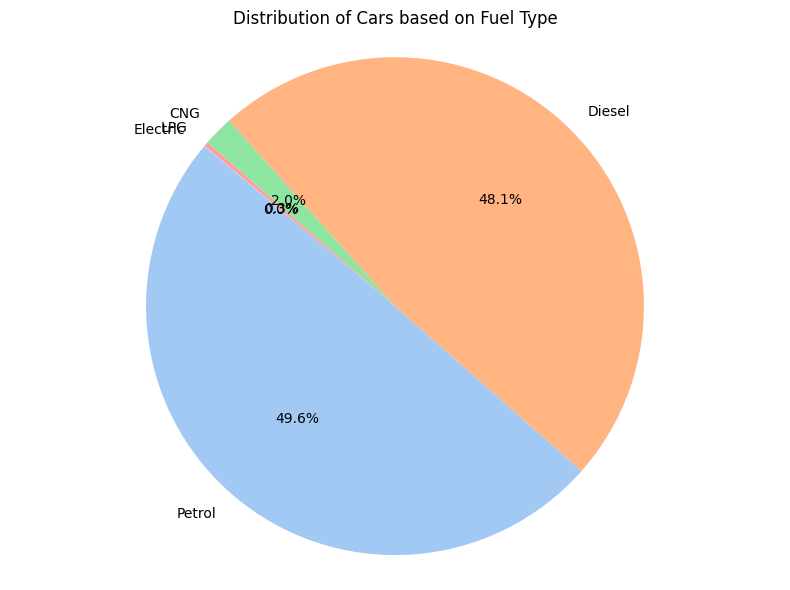

In [2]:
# Pie Chart of Fuel Types
fuel_type_counts = df['fuel_type'].value_counts()
colors = sns.color_palette('pastel')[0:len(fuel_type_counts)]
plt.figure(figsize=(8, 6))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title('Distribution of Cars based on Fuel Type')
plt.tight_layout()
plt.show()


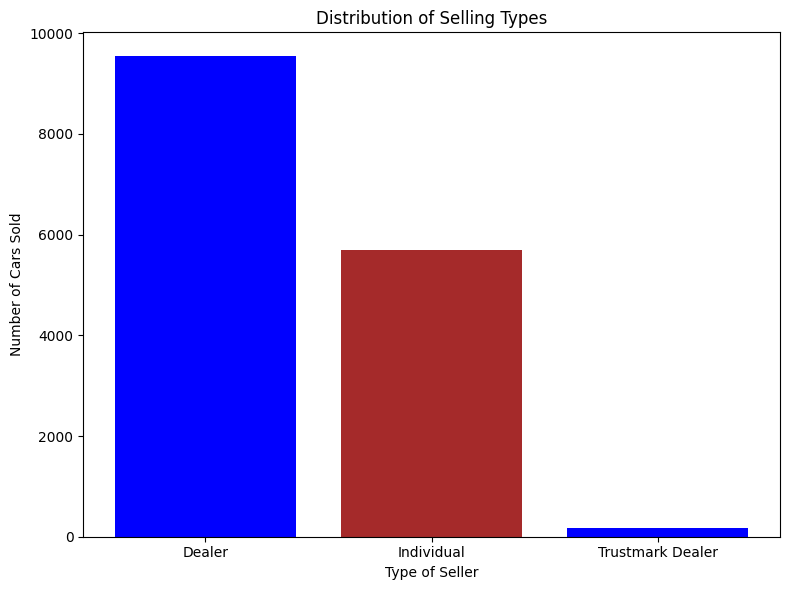

In [3]:
# Distribution of Seller Types
selling_type_counts = df['seller_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(selling_type_counts.index, selling_type_counts.values, color=['blue', 'brown'])
plt.title('Distribution of Selling Types')
plt.xlabel('Type of Seller')
plt.ylabel('Number of Cars Sold')
plt.tight_layout()
plt.show()

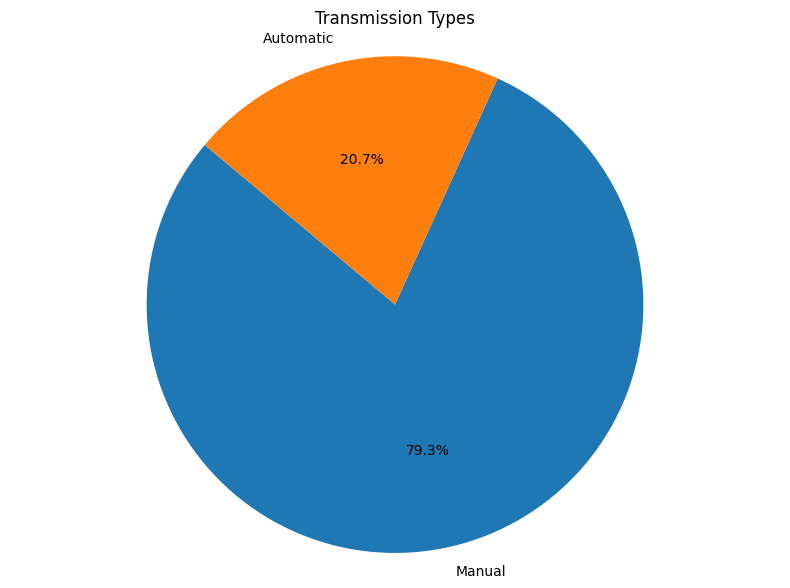

In [4]:
# Plotting the transmission types as a pie chart
transmission_counts = df['transmission_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transmission Types')
plt.axis('equal')
plt.tight_layout()
plt.show()


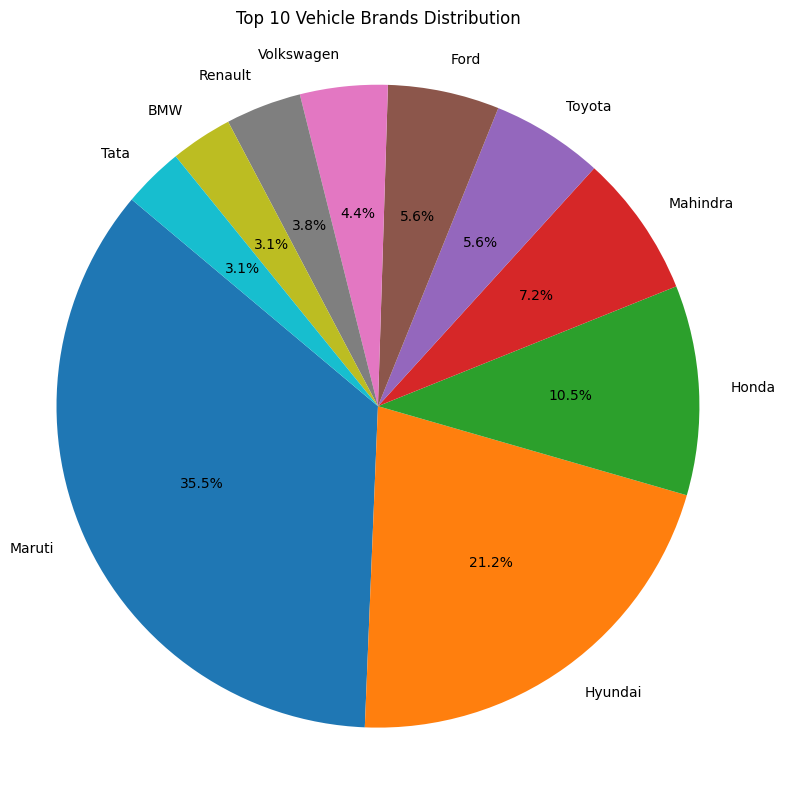

In [5]:
# Top 10 Car Brands Distribution
brand_distribution = df['brand'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(brand_distribution, labels=brand_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Vehicle Brands Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

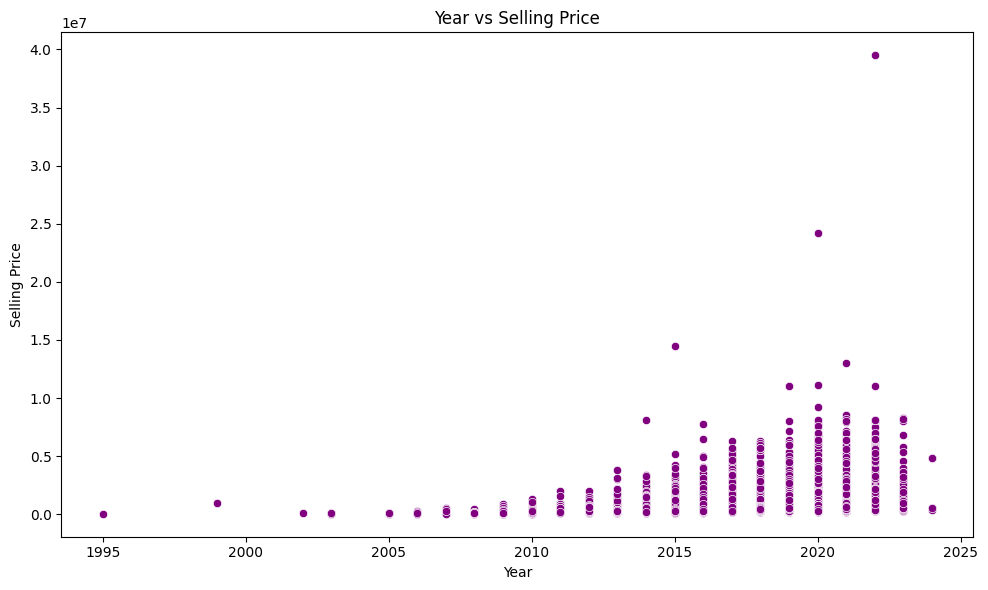

In [6]:
# Year vs Selling Price
df['year'] = 2024 - df['vehicle_age']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df, color='purple')
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()


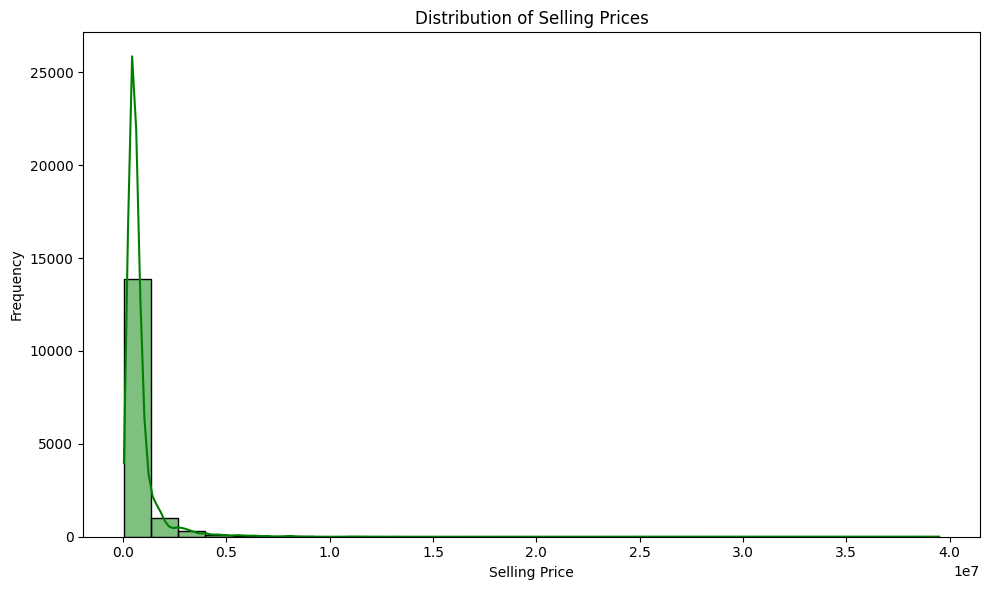

In [7]:

# Selling Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=30, kde=True, color='green')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


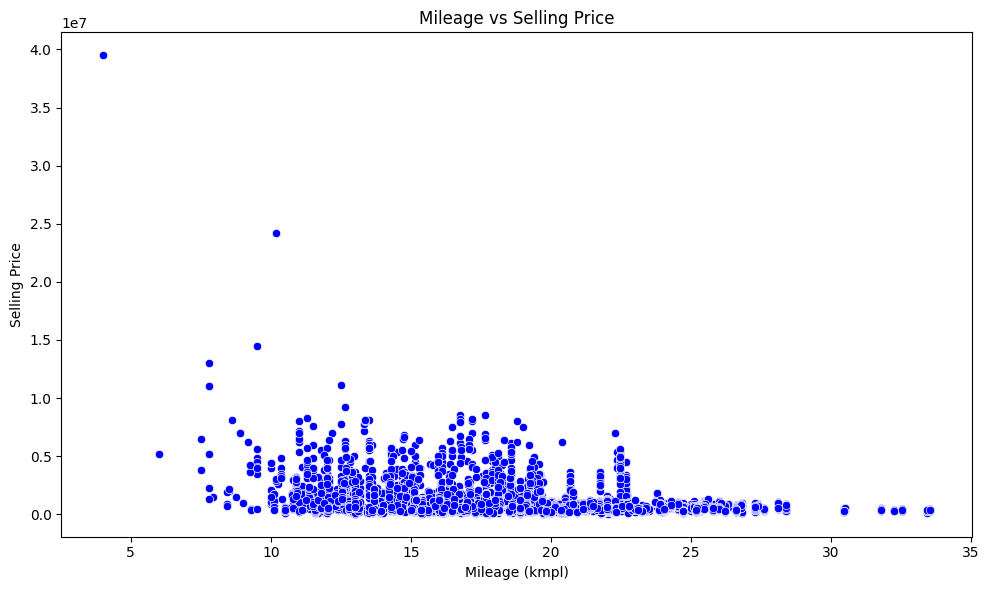

In [8]:

# Mileage vs Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='selling_price', data=df, color='blue')
plt.title('Mileage vs Selling Price')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()


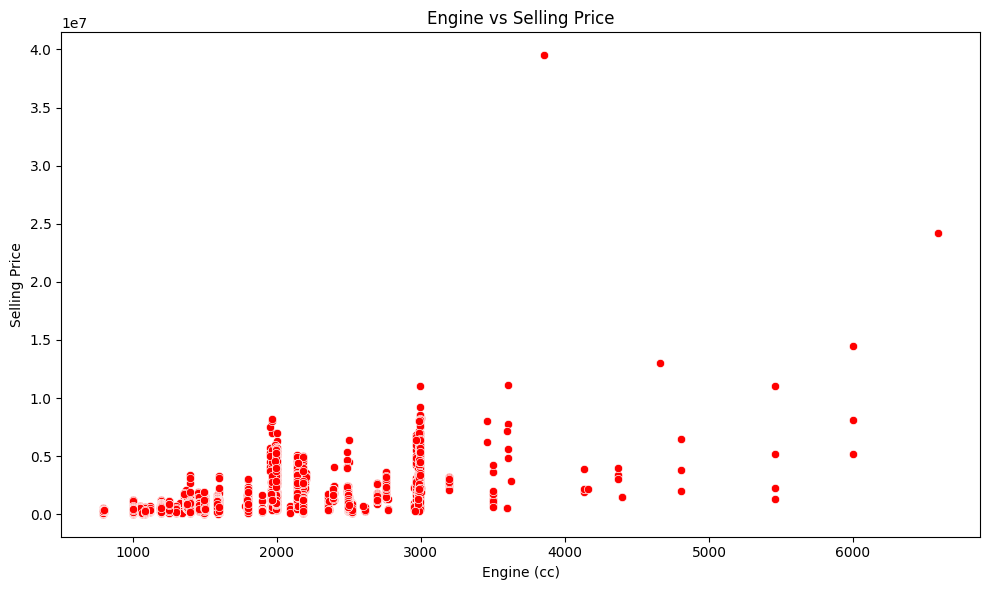

In [9]:
# Engine vs Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine', y='selling_price', data=df, color='red')
plt.title('Engine vs Selling Price')
plt.xlabel('Engine (cc)')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()


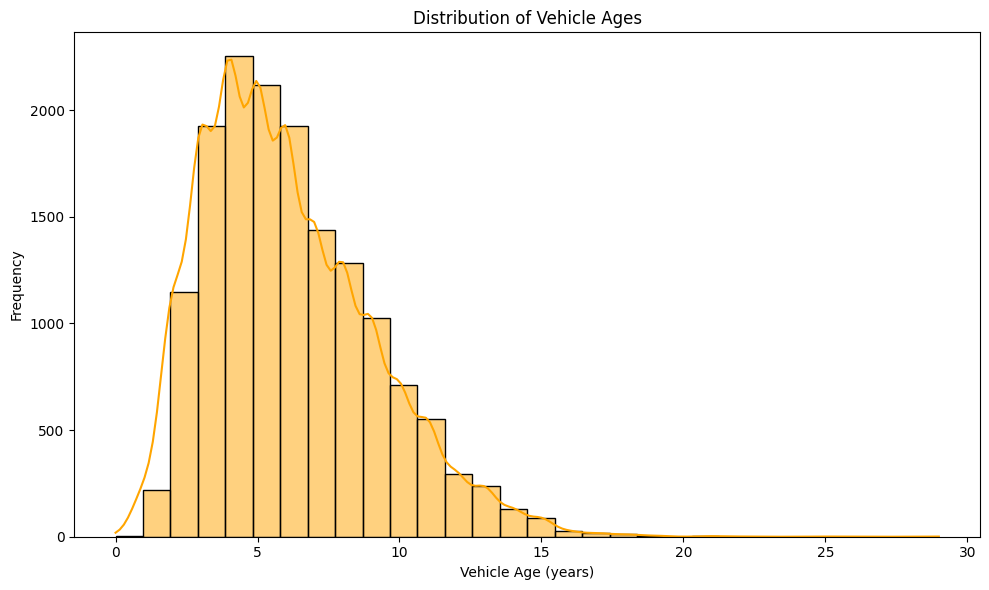

In [10]:

# Vehicle Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['vehicle_age'], bins=30, kde=True, color='orange')
plt.title('Distribution of Vehicle Ages')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<ipython-input-11-4b2f54b76308>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='brand', data=df, order=df['brand'].value_counts().index, palette='viridis')


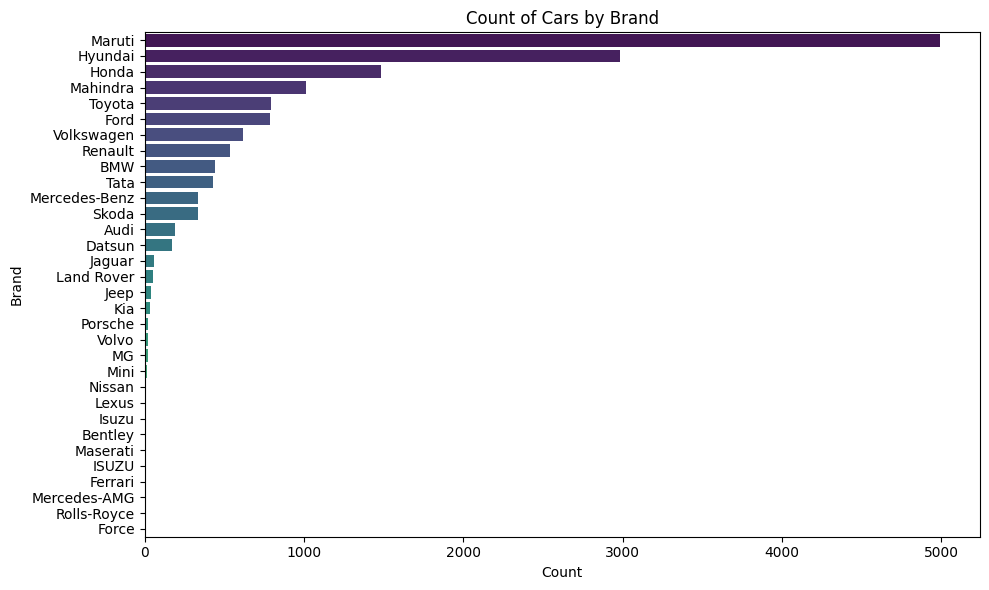

In [11]:

# Count of Cars by Brand
plt.figure(figsize=(10, 6))
sns.countplot(y='brand', data=df, order=df['brand'].value_counts().index, palette='viridis')
plt.title('Count of Cars by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


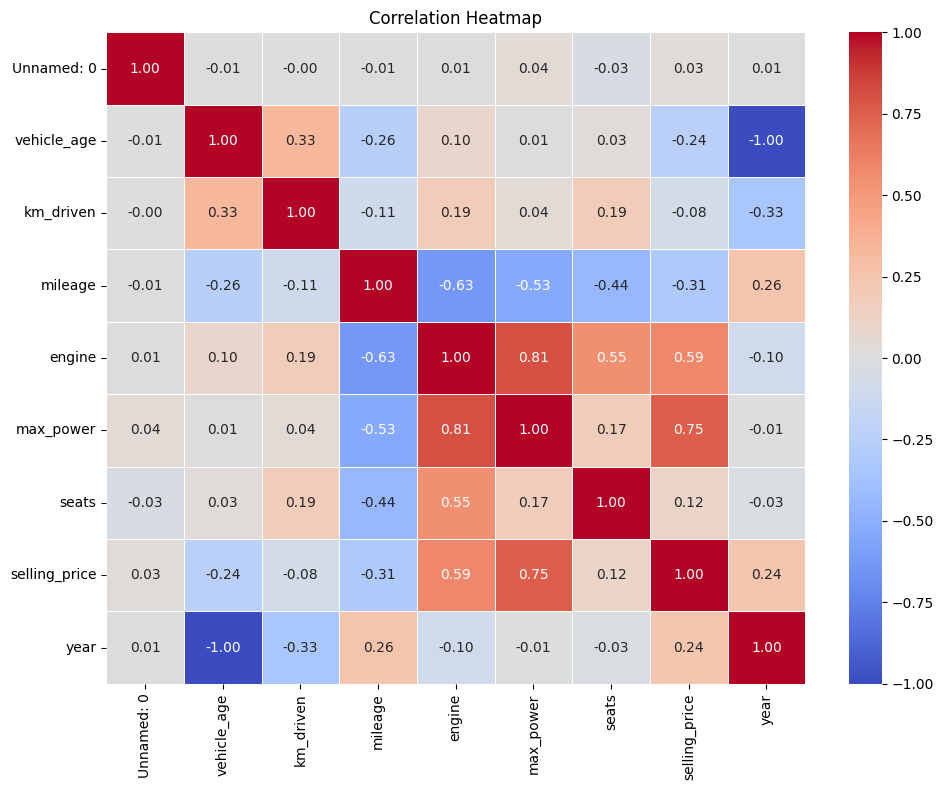

In [12]:

# Correlation Heatmap
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

4. Model Selection and Training
We selected two machine learning models for comparison: Linear Regression and Random Forest Regressor.

Linear Regression: A simple model that assumes a linear relationship between the input features and the target variable. It is computationally efficient but may not capture complex relationships in the data.

Random Forest Regressor: An ensemble learning model that combines multiple decision trees to make predictions. It is better at capturing non-linear relationships and is more robust to overfitting compared to individual decision trees.

Both models were trained using the same training data and evaluated using the test data.

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables using LabelEncoder
le_fuel = LabelEncoder()
df['fuel_type'] = le_fuel.fit_transform(df['fuel_type'])

le_seller = LabelEncoder()
df['seller_type'] = le_seller.fit_transform(df['seller_type'])

le_transmission = LabelEncoder()
df['transmission_type'] = le_transmission.fit_transform(df['transmission_type'])

# Select relevant features and target variable
X = df[['vehicle_age', 'km_driven', 'fuel_type', 'seller_type', 'transmission_type', 'mileage', 'max_power', 'engine', 'seats']]
y = df['selling_price']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions and evaluate the Linear Regression model
y_pred_lr = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression R^2: {lr_r2}")

# 2. Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R^2: {rf_r2}")

# Compare the two models and return the best one based on R^2
if lr_r2 > rf_r2:
    print("Linear Regression is the best model with R^2:", lr_r2)
    best_model = lr_model
else:
    print("Random Forest is the best model with R^2:", rf_r2)
    best_model = rf_model


Linear Regression RMSE: 503049.2531844034
Linear Regression R^2: 0.6638354509519309
Random Forest RMSE: 235727.45163754828
Random Forest R^2: 0.9261838793684634
Random Forest is the best model with R^2: 0.9261838793684634


5. Model Evaluation
After training both models, we evaluated their performance using two key metrics:

Root Mean Squared Error (RMSE): Measures the average magnitude of the error between the predicted and actual values. Lower RMSE indicates better performance.

R² (R-squared): Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher R² indicates better model performance.



6. Best Model Selection
Based on the R² and RMSE values, the Random Forest Regressor outperformed the Linear Regression model. The Random Forest model exhibited a higher R² value and lower RMSE, indicating that it was better at capturing the complexity of the data and predicting car prices accurately.

Thus, Random Forest Regressor was selected as the best model for this car price prediction task.



7. Conclusion
In this project, we successfully built two machine learning models, Linear Regression and Random Forest Regressor, to predict car prices based on various features. After evaluating both models using RMSE and R², we concluded that the Random Forest Regressor was the best model for this task. The model was able to accurately predict car prices, which could be valuable for online car marketplaces, dealerships, and buyers.

The project demonstrates the power of machine learning models in predicting real-world values, such as car prices, based on historical data. Future improvements could include experimenting with other models, tuning hyperparameters, or adding more features to further improve prediction accuracy.

8. Future Work
Hyperparameter Tuning: Fine-tuning the parameters of the Random Forest model using techniques like Grid Search or Random Search can potentially improve performance.
Model Evaluation on Larger Dataset: Testing the model on a larger dataset can provide more robust performance metrics.
Deployment to Web: Building a web application where users can input car details and get a predicted price in real-time.
Incorporating Additional Features: Adding more features, such as car color, previous accident history, or owner details, could further improve the accuracy of predictions.